## Cufflinks

This library binds the power of [plotly](http://www.plot.ly) with the flexibility of [pandas](http://pandas.pydata.org/) for easy plotting.

This library is available on https://github.com/santosjorge/cufflinks

This tutorial assumes that the plotly user credentials have already been configured as stated on the [getting started](https://plot.ly/python/getting-started/) guide.

In [1]:
import pandas as pd
import cufflinks as cf
import numpy as np

We make all charts public and set a global theme

In [2]:
cf.set_config_file(sharing='public',theme='pearl',offline=True)

We create a set of timeseries

In [3]:
df=pd.DataFrame(np.random.randn(100,5),index=pd.date_range('1/1/15',periods=100),
                columns=['IBM','MSFT','GOOG','VERZ','APPL'])
df=df.cumsum()

**iplot** can be used on any DataFrame to plot on a plotly chart. 
If no filename is specified then a generic *Plotly Playground* file is created.

All the charts are created as private by default. To make them public you can use **world_readable=True**

Let's look at the avilable parameters

In [4]:
help(df.iplot)

Help on method _iplot in module cufflinks.plotlytools:

_iplot(kind='scatter', data=None, layout=None, filename='', sharing=None, title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='', interpolation='linear', symbol='circle', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', secondary_y_title='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Returns a pl

In [5]:
df.iplot(filename='Tutorial 1')

### Customizing Themes

We can pass a **theme** to the **iplot** function. 
3 themes are available, but you can create your own
* Solar
* Pearl (Default)
* White

In [6]:
df[['APPL','IBM','VERZ']].iplot(theme='white',filename='Tutorial White')

We can also pass common metadata for the chart

In [7]:
df.iplot(theme='pearl',filename='Tutorial Metadata',title='Stock Returns',xTitle='Dates',yTitle='Returns')

### Bestfit Lines

We can easily add a bestfit line to any Series

This will automatically add a best fit approximation and the equation as the legend.

In [8]:
df['IBM'].iplot(filename='IBM Returns',bestfit=True)

### Customizing Colors

We can pass any color (either by Hex, RGB or Text *)  

*Text values are specified in the cufflinks.colors modules

In [9]:
df['IBM'].iplot(filename='IBM Returns - colors',bestfit=True,colors=['pink'],bestfit_colors=['blue'])

### Filled Traces

We can add a fill to a trace with **fill=True**

In [10]:
df['IBM'].iplot(filename='Tutorial Microsoft',fill=True,colors=['green'])

### Bar Charts

We can easily create a bar chart with the parameter **kind**

In [11]:
df.sum().iplot(kind='bar',filename='Tutorial Barchart')

Bars can also be stacked by a given dimension

In [12]:
df.resample('M').mean().iplot(kind='bar',barmode='stack',filename='Tutorial Bar Stacked')

### Spread and Ratio charts

We can also create spread and ratio charts on the fly with **kind='spread'** and **kind='ratio'**

In [13]:
df[['VERZ','IBM']].iplot(filename='Tutorial Spread',kind='spread')

In [14]:
(df[['GOOG','MSFT']]+20).iplot(filename='Tutorial Ratio',kind='ratio',colors=['green','red'])

### Annotations

Annotations can be added to the chart and these are automatically positioned correctly. 

**Annotations** should be specified in a dictionary form

In [15]:
annotations={'2015-01-15':'Dividends','2015-03-31':'Split Announced'}
fig = df['MSFT'].iplot(filename='Tutorial Annotations',annotations=annotations,asFigure=True)

### Output as Image

The output of a chart can be in an image mode as well. 

For this we can use **asImage=True**

We can also set the dimensions (optional) with **dimensions=(width,height)**

Image saved : Tutorial Image.png


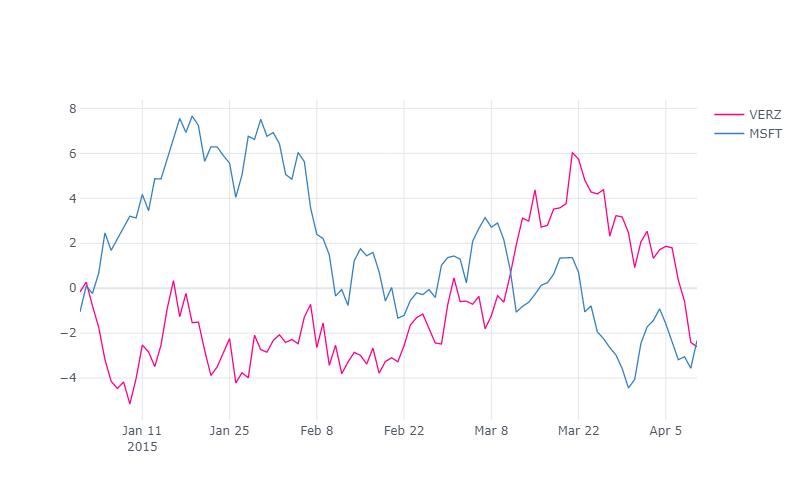

In [16]:
df[['VERZ','MSFT']].iplot(filename='Tutorial Image',theme='white',colors=['pink','blue'],asImage=True,dimensions=(800,500))

### Advanced Use

It is also possible to get the Plotly Figure as an output to tweak it manually

We can achieve this with **df.figure()**

In [17]:
df['GOOG'].figure()

We can also get the **Data** object directly

In [18]:
data=df.figure()['data']

In [19]:
data[0]['name']='My Custom Name'

And pass this directly to **iplot**

In [20]:
df.iplot(data=data,filename='Tutorial Custom Name')